# 8_Flood_Depth_Prediction: People

Please see the model notebook and resources documentation for attribution on the model.

This notebook does NOT train a new model; it will build an identical model and load the weights, then use the model for predictions only. 

Ways to use this notebook:
 1. Run the notebook AS-IS    
 If you run the notebook as is, it will rebuild the model (< 1 minute) and run the predictions on the pre-configured test folder.
 1. Modify the test folder
 If you modify the global parameter to point to another image folder, the model will perform predictions on the images in that folder.

## Contents:  
 1. Notebook Setup
 2. (Re-) Build the model
 3. Predictions Setup
 4. Predictions

# 1. Notebook Setup

## Import

In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.models import load_model
from keras.preprocessing import image

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

Using TensorFlow backend.
/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/t

In [2]:
keras.__version__ # expecting 2.3.1 or possibly higher

'2.3.1'

## User configurable settings

In [3]:
# Designate filepath for images
# Change this path if you would like to receive predictions on images from another folder
# The example user_images contains 2 categories: unknown_Cristobol and unknown_other

image_test_dir = '../images/people/test'

# image_test_dir = '../images/user_images'




-----------   DO NOT MODIFY BEYOND THIS POINT ---------  

Please run the notebook and then scroll to the bottom to see image predictions.

## Utility functions

In [4]:
# Remove .DS_store from the list of files in a directory
def rm_DS(mlist): 
    if ('.DS_Store' in mlist): mlist.remove('.DS_Store')
    return mlist

In [5]:
# Model weights to load

# Model name must match name for model_weights_for_saving in Flood_Depth_Model_Training Notebook
model_weights = './model_people_weights.h5'

# Category predictions
prediction_labels = sorted(rm_DS(os.listdir(image_test_dir)))   
num_categories = len(prediction_labels)

# Preview prediction labels
prediction_labels

['depth_0', 'depth_1', 'depth_2', 'depth_3', 'depth_4']

# 2. (Re-) Build the model

Model building and training were described in an earlier notebook. 

CAUTION: Do not make changes to this model. It must exactly match the training model in order to re-use the model weights.

In [6]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", 
                 activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=num_categories, activation="softmax")) # needs to be the same as the num classes

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.load_weights(model_weights)

# 3. Predictions Setup

## Utilities for predictions

In [8]:
# Show the images with the Actual and Predicted classifications
def evaluate_test_images(cat,image_test_dir,image_list):
    '''cat : name of image category
       img_list: list of images that should be in that category'''

    tot_images = len(image_list)
    tot_div_2 = (tot_images/2)+1
    
    # TODO: Start a dictionary of actual vs predicted so we can get a confusion
    #.    matrix

    fig = plt.figure(figsize=(14,4*tot_div_2)) # size for 2 columns

    img_num = 1
    ax_list = []
    fontsize = 20
    tot_images = len(image_list)
    
    list_true_labels = []
    list_pred_labels = []
    
    print(f"Evaluating {image_test_dir} with {len(image_list)} images")

    for img_file in image_list:
        use_image = image_test_dir + '/' + img_file
        ax = fig.add_subplot(tot_div_2,2,img_num)

        img = image.load_img(use_image,target_size=(224,224))
        img = np.asarray(img)

        plt.imshow(img)

        img = np.expand_dims(img, axis=0)
        output = saved_model.predict(img)
        best_match = np.argmax(output)

        title_str = "Image: " + str(img_file) + '\n' + "Actual: " + cat + '\n' + "Predicted: " + prediction_labels[best_match]
        ax.set_title(title_str,fontsize=fontsize)
        ax_list.append(ax)
        img_num += 1

        # save the labels for the confusion matrix
        list_true_labels.append(cat)
        list_pred_labels.append(prediction_labels[best_match])
        
    plt.tight_layout()
        
    return list_true_labels, list_pred_labels

# 4. Predictions

To do predictions on the trained model, we will
- load the best saved model 
- pre-process the image to fit the model
- pass the image to the model to get the prediction
- display the model with the actual category and the predicted category

In [9]:
# Rename the model to avoid reworking the code (code must match previous notebook)
saved_model = model

In [10]:
# Print status on categories

if (image_test_dir == '../images/people/test'):
    print(f"Checking the model on images in the test directory with categories: \n\n{prediction_labels}")
else:
    print(f"Checking the model on images in the user directory with categories: \n\n{prediction_labels}")

Checking the model on images in the test directory with categories: 

['depth_0', 'depth_1', 'depth_2', 'depth_3', 'depth_4']


Category depth_0 has 15 test images.
Evaluating ../images/people/test/depth_0 with 15 images
Category depth_1 has 14 test images.
Evaluating ../images/people/test/depth_1 with 14 images
Category depth_2 has 4 test images.
Evaluating ../images/people/test/depth_2 with 4 images
Category depth_3 has 20 test images.
Evaluating ../images/people/test/depth_3 with 20 images
Category depth_4 has 15 test images.
Evaluating ../images/people/test/depth_4 with 15 images


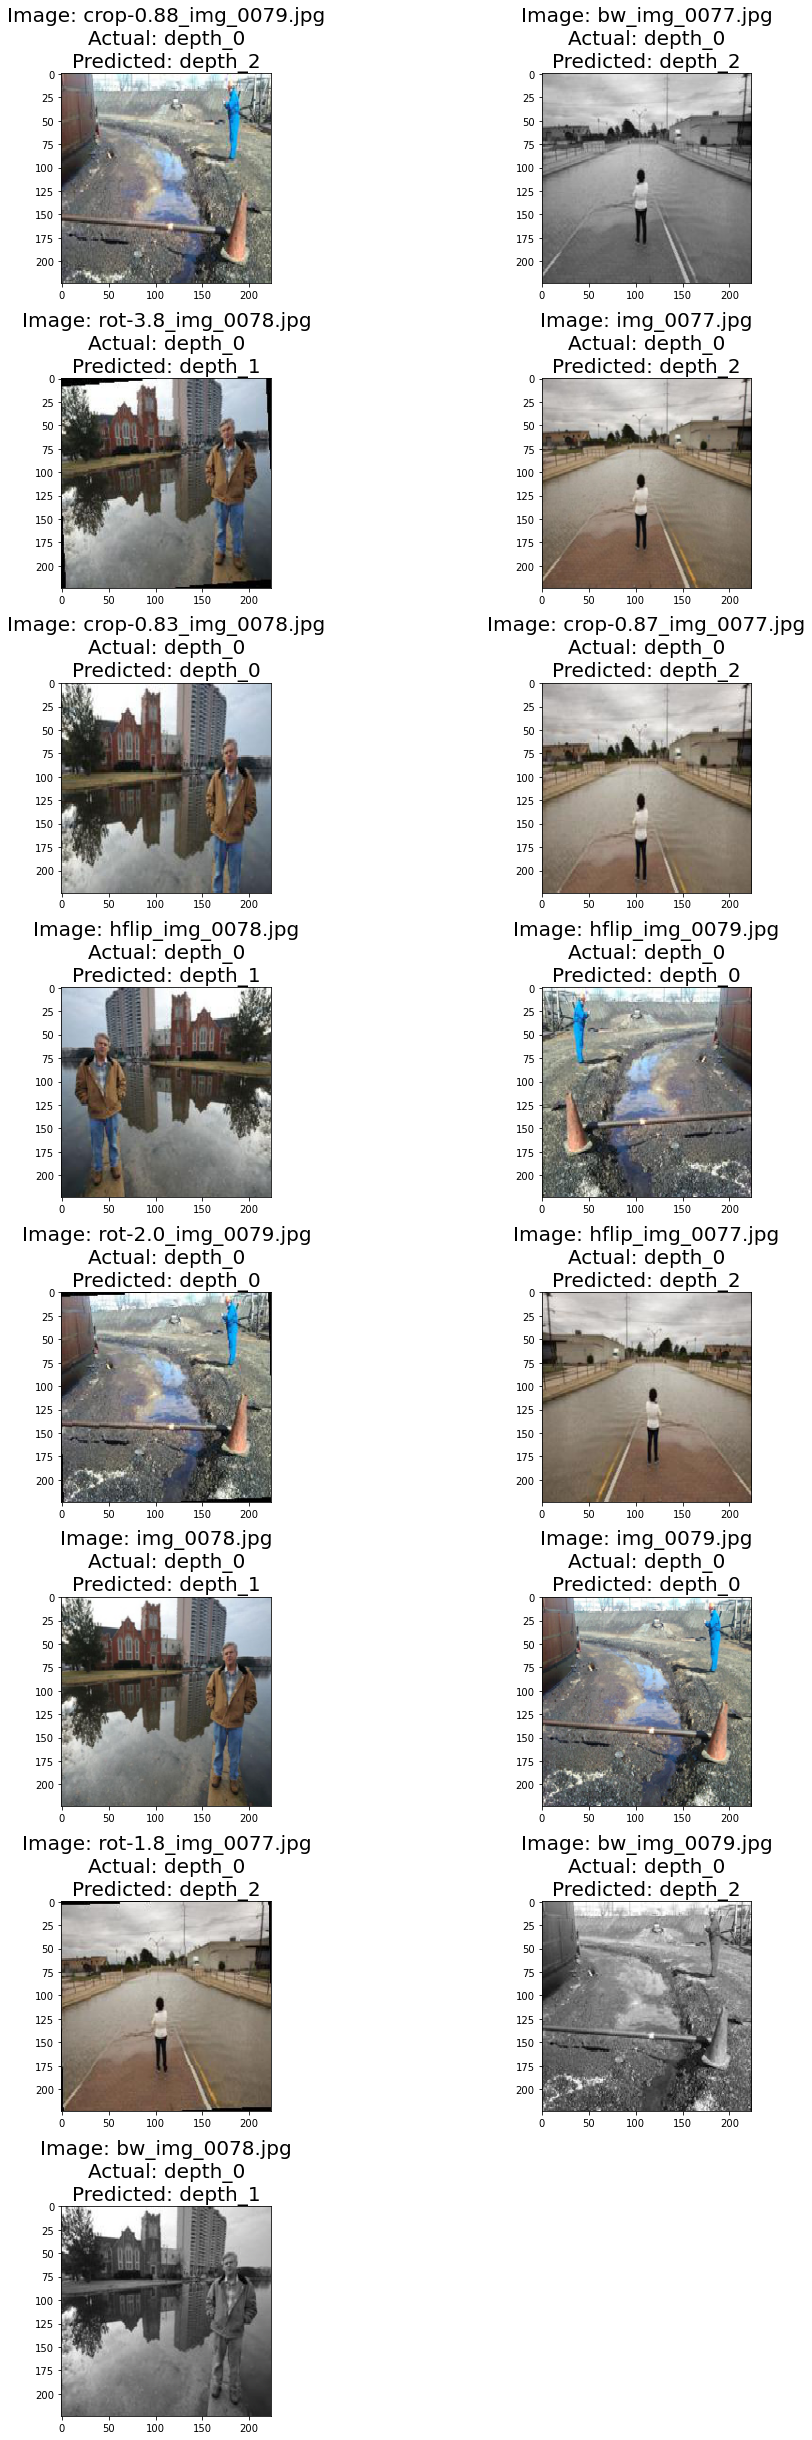

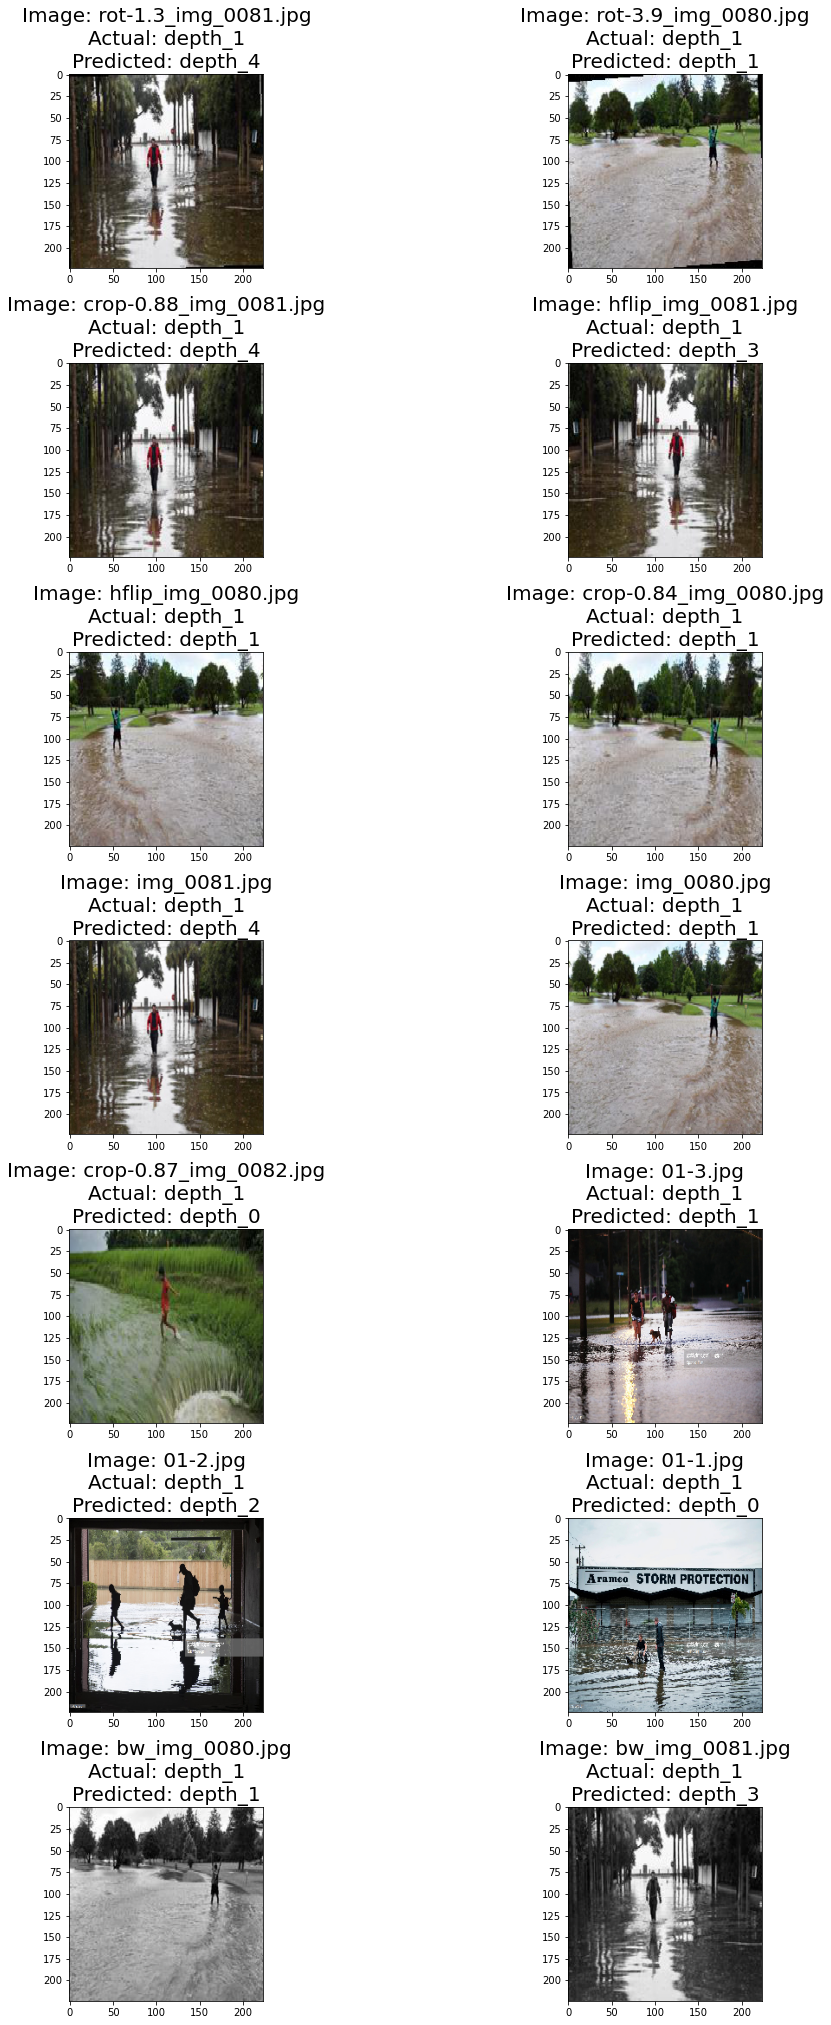

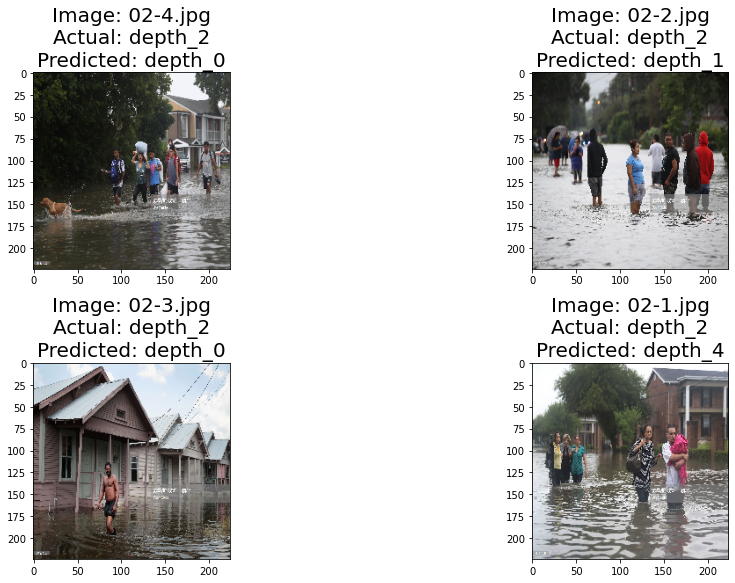

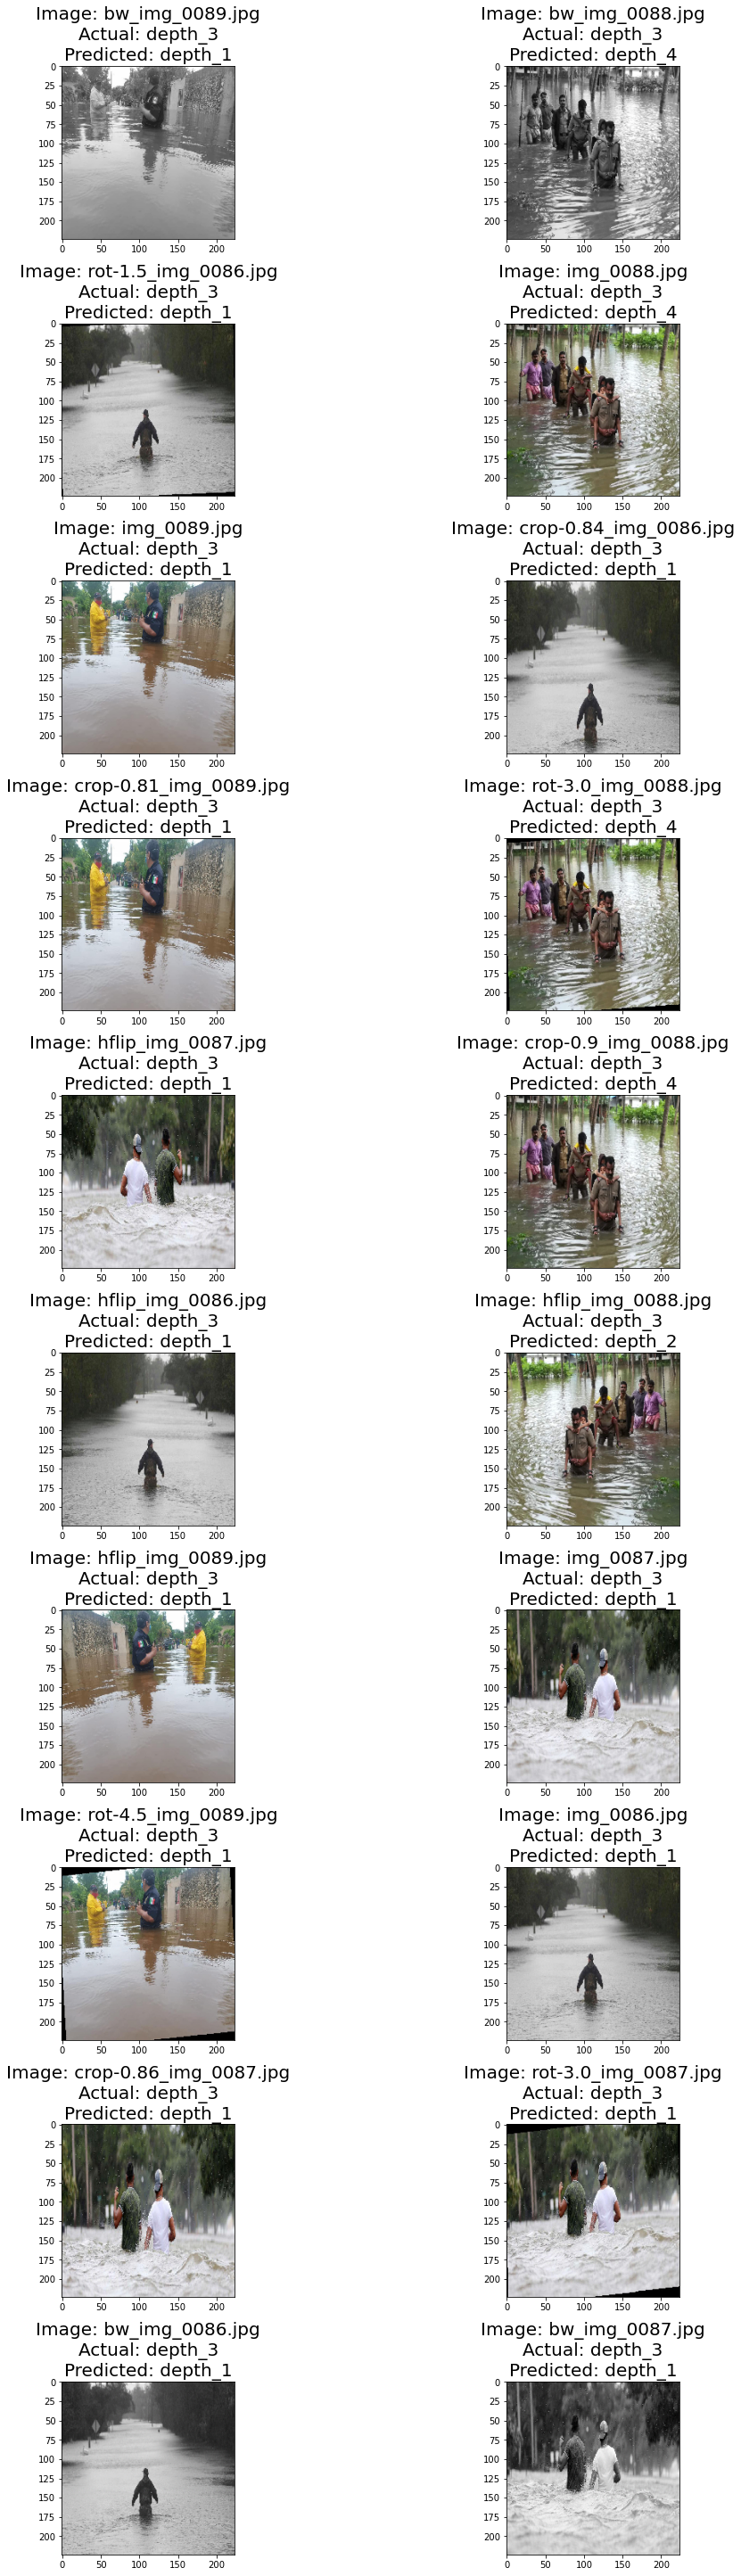

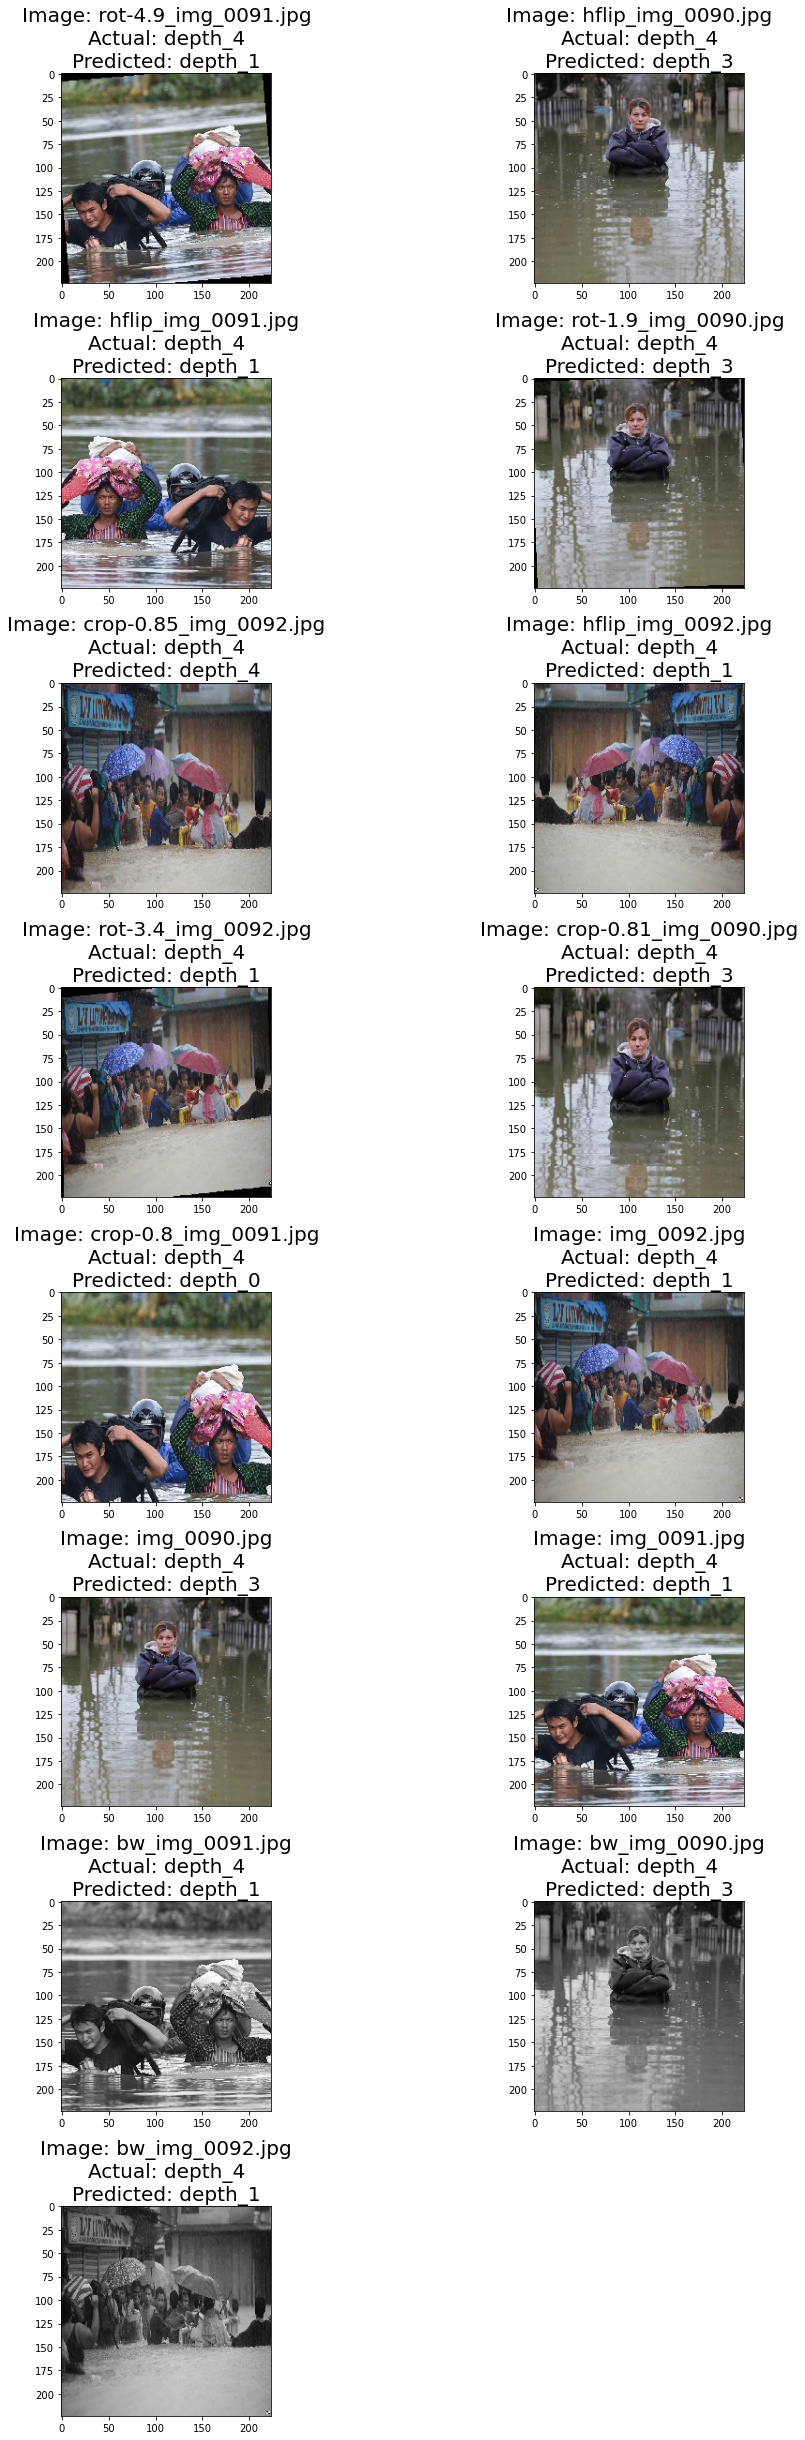

In [11]:
# Generate images with prediction vs actual designation

category_list = rm_DS(os.listdir(image_test_dir))
labels = sorted(category_list)

full_list_true_labels = []
full_list_pred_labels = []

for caty in labels:
    category_dir = image_test_dir + '/' + caty
    img_list = rm_DS(os.listdir(category_dir))
    print(f"Category {caty} has {len(img_list)} test images.")
    l_true, l_pred = evaluate_test_images(caty,category_dir,img_list)
    
    full_list_true_labels += l_true
    full_list_pred_labels += l_pred

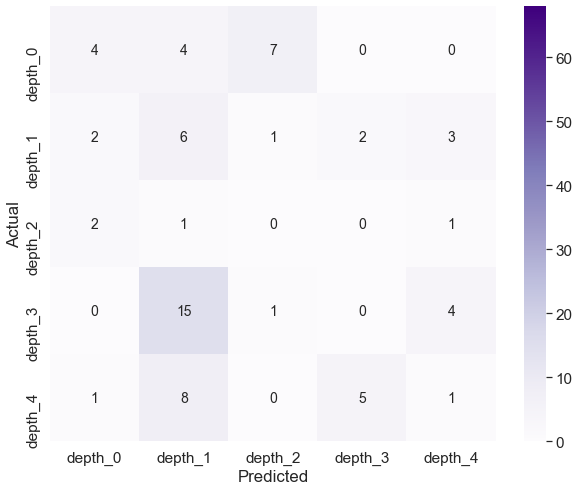

In [12]:
if image_test_dir == '../images/user_images':
    pass
else:
    cm_array = confusion_matrix(full_list_true_labels, full_list_pred_labels)
    df = pd.DataFrame(cm_array, index=prediction_labels, columns=prediction_labels)

    plt.figure(figsize=(10,8))
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df, cmap = 'Purples', annot=True, vmax = len(full_list_true_labels),
                    fmt="d", annot_kws={"size": 14}) # font size
    plt.ylabel("Actual")
    plt.xlabel("Predicted");